# Review

1. You are writing an algorithm that has a 95% chance of giving you a correct answer. Your friend has the answer key and can validate whether the algorithm is correct or not. What is the probability that the algorithm gives a correct answer after:
    1. running it once?
 1. (0.95)
    1. running it 5 times?
2. 1- (0.95)^5
    1. running it 200 times?
 2. 1- (0.95)^200

INDEPENDENCE MATTERS

2. Let X = a random number within $[1-100]$ (flat distribution)
   1. What is the sample space?
3. Sample space is all 100 options if these are only integers, or all real numbers from 1-100 inclusive 
   1. What is the probability of getting a number within $(20,75]$?
   2. 55/100 if its integers
   3. 55/99 if its real numbers
   

3. Let X = outcome of rolling a 20-sided die twice.
   1. What is the sample space? Represent this as a list of tuples.
4. {1-1,1-2,1-3....20-1,20-2...20-20}
   1. Write a function `p_d20_twice(e)` that takes a tuple and returns the probability of rolling that tuple.
5. 
   1. Write a function `p_sum(n)` that returns the probability of the rolls adding up to `n`. Use `p_d20_twice` as a helper function.

In [2]:
def p_d20_twice(e):
    return(1/400)


def p_sum(n):
    total=0.0
    for i in range (1,21):
        for j in range (1,21):
            if i+j ==n:
                total+=p_d20_twice((i,j))
    return total

p_sum(3)
    
    
    
    

0.005

# Penguins are Back
Let's suppose that our `penguins` dataset contains accurate information about every single penguin on Earth. A team of alien researchers from planet Pengalien is interested in the average penguin bill length.

1. Fortunately for Earth inhabitants, penguin researchers have already amassed all the data they need. What is the average bill length of all penguins?

In [5]:
import pandas as pd
import random
from random import sample




def randPenguins():
    total=random.sample(list(penguins["bill_length_mm"]),5)
    average=sum(total)/5
    print(average)

randPenguins()





    

46.620000000000005


In [4]:
penguins = pd.read_csv("Datasets/penguins.csv")
penguins["bill_length_mm"].mean()

43.9219298245614

2. Unfortunately for Pengaliens, they don't have the same wealth of penguin knowledge. Their research team is poorly funded, and they only have the resources to come down and extract 5 penguins at a time.
   1. Write code to get a _sample_ of 5 penguins.
   ##penguins.sample(5)
   2. What is the average bill length of this sample?
3. 43.9 mm
   1. How close did the Pengaliens get to the actual average bill length?
   
   its generally pretty close (+-3mm)

3. Fortunately for Pengaliens, their top engineers finally got approved for their tractor beam grant. This upgrade allows them to beam up _n_ penguins at a time.
   1. Write a function `sample_mean(n)` that takes a sample of `n` penguins and returns the mean bill length of that sample.
4. 
   1. Write a function `sample_means(N,n)` that returns a list containing the result of running `sample_mean(n)` `N` times.

In [6]:
def sample_mean(n):
    total=random.sample(list(penguins["bill_length_mm"]),n)
    average=sum(total)/n
    return(average)

print(sample_mean(6))

def sample_means(N,n):
    listN=[]
    for i in range(N):
        listN.append(sample_mean(n))
    return listN

print(sample_means(6,5))


45.13333333333333
[41.14, 43.46, 47.58, 42.6, 41.76, 47.839999999999996]


# Sampling Distribution of Sample Means 

1. Use `seaborn` or `altair` to generate a histogram for `sample_means(10,5)`. This histogram is the **sampling distribution** of the *sample mean*. We're looking at $N=10$ samples of $n=5$ penguins each.
   1. What happens to the sampling distribution as we increase `N`?
2. a lot more trials so we have a higher value in each bucket
   1. What happens to the sampling distribution as we increase `n`?
3. A lot less varaiation as we sample from more penguins so our values are more standardized

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

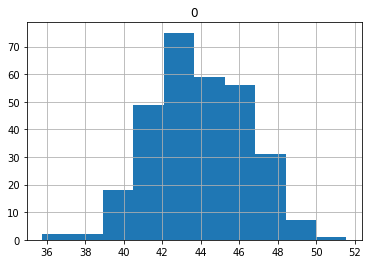

In [7]:
import pandas as pd

df=pd.DataFrame(sample_means(300,5))


import matplotlib
df.hist()

2. Let X = bill length of a randomly selected penguin.
   1. What is the expected value of X?  
   _Hint: The sampling distribution can be interpreted as a probability distribution!_
   2. How far off is the expected value from the actual mean bill length?
   3. Does your answer to the previous question change if `N` or `n` is increased?

3. Summarize how random variables can be used to estimate actual attributes of a population.

# Sampling Distribution of Sample Proportions
Arithmetic means are not the only attribute of a population that can be sampled. We can also look at proportion; e.g. what % of all penguins are Gentoo?

1. The Pengaliens are back at it again, but this time they want to examine Gentoo penguins.
   1. What is the actual % of Gentoo penguins on Earth?
2. 
   1. Write a function `sample_proportion(n)` that returns the % of Gentoo pengins from a sample of `n` penguins.
   2. Write a function `sample_proportions(N,n)` that returns a list of the results of running `sample_proportion(n)` `N` times.

In [38]:
penguins = pd.read_csv("Datasets/penguins.csv")
len(penguins[penguins["species"]=="Gentoo"].index)/len(penguins.index)

0.35964912280701755

In [44]:


def sample_proportion(n):
    df=penguins.sample(n)
    return(len(df[df["species"]=="Gentoo"].index)/len(df.index))

#sample_proportion(6)

def sample_proportions(N,n):
    listN=[]
    for i in range(N):
        listN.append(sample_proportion(n))
    return listN

sample_proportions(14,9)



[0.5555555555555556,
 0.5555555555555556,
 0.5555555555555556,
 0.4444444444444444,
 0.2222222222222222,
 0.2222222222222222,
 0.4444444444444444,
 0.4444444444444444,
 0.1111111111111111,
 0.3333333333333333,
 0.2222222222222222,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444]

2. Similar to the **sampling distribution of sample means**, let X = the % of Gentoo penguins in our sample. Create a histogram to visualize the **sampling distribution of sample proportions**. Analyze the center of this distribution; how far is it from the actual percentage that you calculated earlier?

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

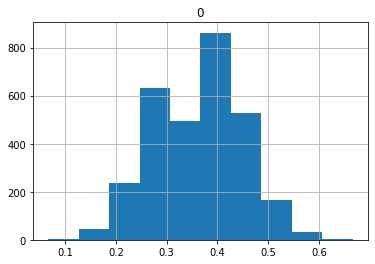

In [48]:
import pandas as pd

df=pd.DataFrame(sample_proportions(3000,30))


import matplotlib
df.hist()

# Central Limit Theorem
As you may have noticed, the more samples you take, the more symmetrical and non-skewed the histograms become. The **Central Limit Theorem** states that as you increase the sample size, the sampling distribution of those samples approaches a **normal distribution**. From this, we can infer that the expected value of the mean of the sampling distribution will approach the population parameter that we are looking for.

# Practice

1. An entomologist is researching cicadas, and since billions of Brood X cicadas are coming this year, they have the perfect chance to get samples. Their first study consists of 100 samples of 10 cicadas each; the sampling distribution of the sample mean of cicada wingspan has a mean of 18cm and a standard deviation of 1cm.

    a. Interpret these statistics. Would you be surprised to find a cicada with a wingspan of 18.5cm? What about 21cm?
    Since the mean is 18, it is not suprising that we have a 18.5 as it is within 1 std
    21 is a few std apart so not too likely.

    b. What would happen to the standard deviation if 1000 samples were taken instead of 100?
    this sampling distribution would look more like a normal distributions

2.  A linguist conducts a survey at school to see how many students can speak more than one language. After a sample of 200 students, the linguist arrives at a sample proportion of 25%. How might information (such as the mean or standard deviation) about the sampling distribution of the sample proportion help the linguist determine the accuracy of the survey?

if the standard deviation is closer to 50% after sampling many many students, then its an innacurate survey

3.  A candy enthusiast has a particular dislike of sour candies. As a gift, their friend buys them a big assortment of candy, but 5% of the candy within this bag is sour. Describe what the sampling distribution of the sample proportion would look like after taking 1000 samples (center, variability, skew).
   
   ????